___
# Iris Flower Species

For this series of lectures, we will be using the famous [Iris flower data set](https://www.kaggle.com/uciml/iris). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

___
## Data
The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

* Iris-setosa 
* Iris-versicolor 
* Iris-virginica 

The four features of the Iris dataset:

* Sepal Length (in cm)
* Sepal Width (in cm)
* Petal Length (in cm)
* Petal Width (in cm)


In [34]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
iris = pd.read_csv('Iris.csv')    #stored the dataset into variable "iris"
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**As we can see above there are total of 150 entries in each column, and none of them are empty/null.    
Now that we don't have any missing values we can process the following data.**

We have a column name "Id" in our dataset which doesn't show any significance, its just a numbering column.   
So we can go on drop that column.

In [38]:
iris = iris.drop('Id', axis=1)

____
## Exploratory Data Analysis

Now that we have a processed dataset we can perform some EDA on it and get better insights from it.

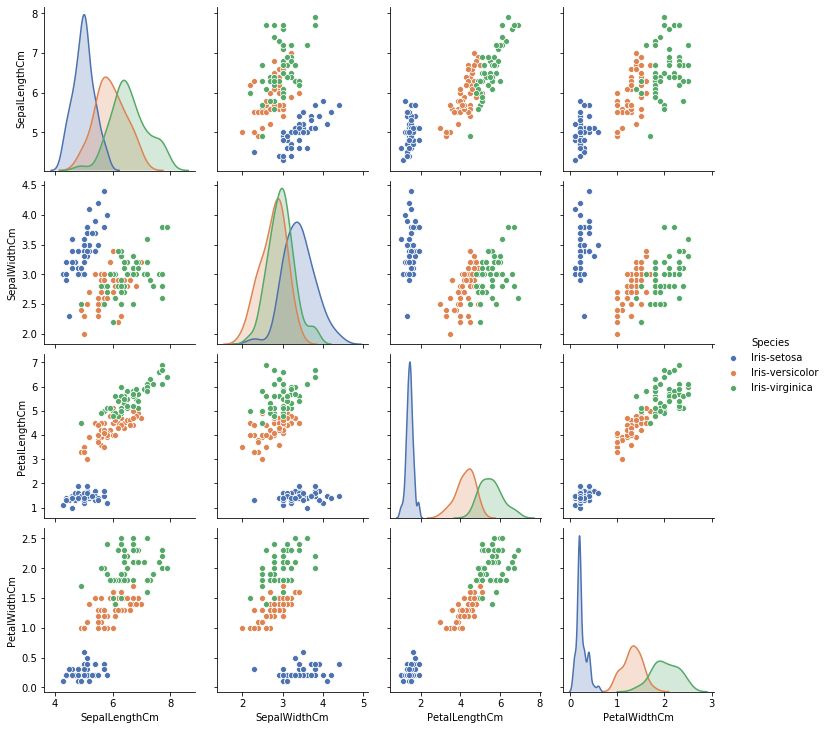

In [39]:
sns.pairplot(iris, hue='Species', palette='deep')

The above pairplot shows some clear distinction between 'Iris-setosa' and other two flower species.

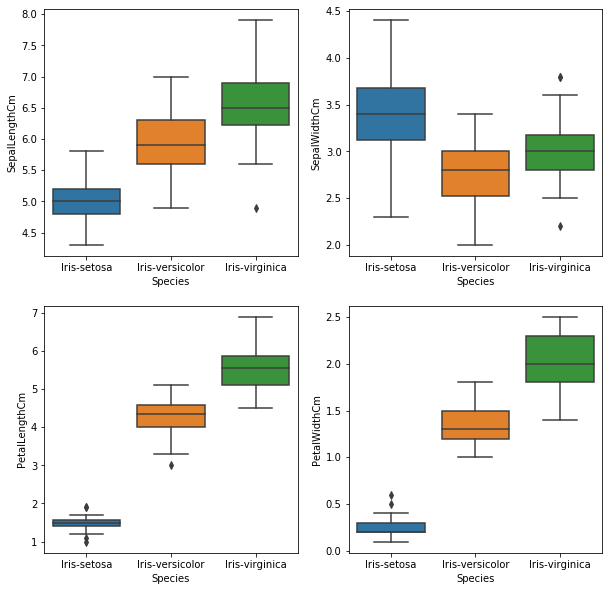

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris)

plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris)

plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)

plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris)

___
## Implementing Machine Learning

We are going to split our dataset into training and testing data. The split will be done into 70/30, in    
which 70% will be the training data and 30% will be the testing data.    
After that we will be implementing Gaussian Naive Bayes algorithm. 

In [41]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [42]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]   #these are the feature columns
y = iris['Species']                                                            #these is the target column

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#importing Naive Bayes algorithm from Sci-kit Learn library

from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()                             #initiating Gaussian Naive Bayes into "gNB"

In [46]:
#fitting the training data into the model

gNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
#predicting off of trained model

predict = gNB.predict(X_test)

___
## Evaluation

We have trained our model and predicted off of it. We can now evaluate     
the model's prediction. For that purpose we will use confusion matrix    
and classification report.

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(classification_report(y_test,predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


Our Gaussian Naive Bayes model gives the accuracy of 98%. This is pretty good accuracy.   
The Confusion matrix shows us that model predicted:    
* Iris-setosa: Correct 19, Wrong 0
* Iris-versicolor: Correct 12, Wrong 1 (Model wrongly predicted 'Iris-versicolor' as 'Iris-virginica')
* Iris-virginica: Correct 13, Wrong 0
___